In [38]:
import boto3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [39]:
def download_file_from_s3(bucket_name, s3_key, local_path):
    s3 = boto3.client('s3')
    s3.download_file(bucket_name, s3_key, local_path)
    print("Downloading complete")
    



In [40]:
download_file_from_s3('mysuperdiet', 'raw/data.csv', 'data.csv')

In [41]:
#Exploratory Data Analysis (EDA)

df = pd.read_csv('data.csv')
print(df.head())

         Date     food_name typeoffood  protein  carb   fat  sugar  fiber  \
0  2025-10-01           Egg    healthy     24.0   2.0  10.0    0.0    0.0   
1  2025-10-01          Rice    healthy      4.0  45.0   0.0    0.0    0.0   
2  2025-10-01       Kurkure       junk      2.0  20.0   8.0    0.0    0.0   
3  2025-10-01      Sev_puri       junk      4.0  40.0  10.0    0.0    0.0   
4  2025-10-01  Dragon_fruit    healthy      2.0  23.0   0.2   13.0    6.0   

   calories  
0       280  
1       200  
2       150  
3       250  
4       120  


In [42]:
#Do we have missing values?
print(df.isnull().sum())

Date          0
food_name     0
typeoffood    0
protein       0
carb          0
fat           0
sugar         0
fiber         0
calories      0
dtype: int64


In [43]:
df.describe()

,protein,carb,fat,sugar,fiber,calories
count,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000
mean,9.743023,29.967442,9.146512,6.835581,3.378721,244.837209
std,11.313236,36.006772,12.448753,9.225866,12.922802,277.316505
min,1.000000,0.200000,0.000000,0.000000,0.000000,15.000000
25%,2.000000,10.000000,0.300000,0.000000,0.000000,120.000000
50%,5.000000,26.000000,10.000000,2.500000,2.000000,200.000000
75%,12.000000,40.000000,14.000000,13.000000,3.000000,300.000000
max,76.000000,308.000000,96.000000,30.000000,120.000000,2424.000000


Text(0, 0.5, 'Sugar Content mean(g)')

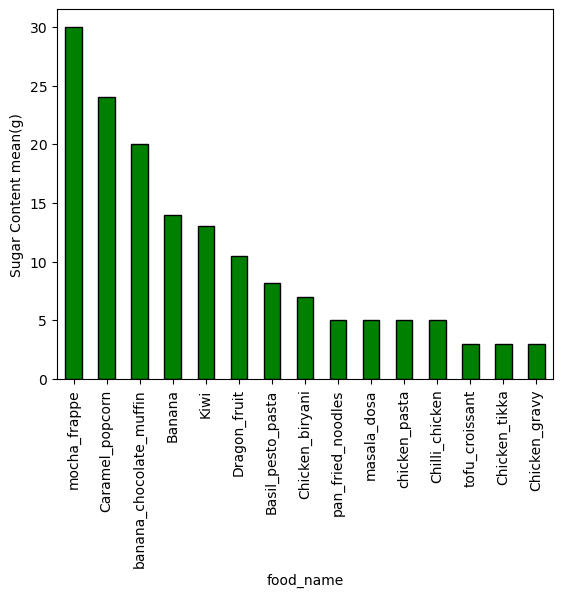

In [44]:
df.groupby('food_name')['sugar'].mean().sort_values(ascending= False).head(15).plot(kind='bar',color='green',edgecolor='black')
plt.ylabel("Sugar Content mean(g)")

Text(0.5, 1.0, 'Average Sugar and Protein Intake by Day of the Week')

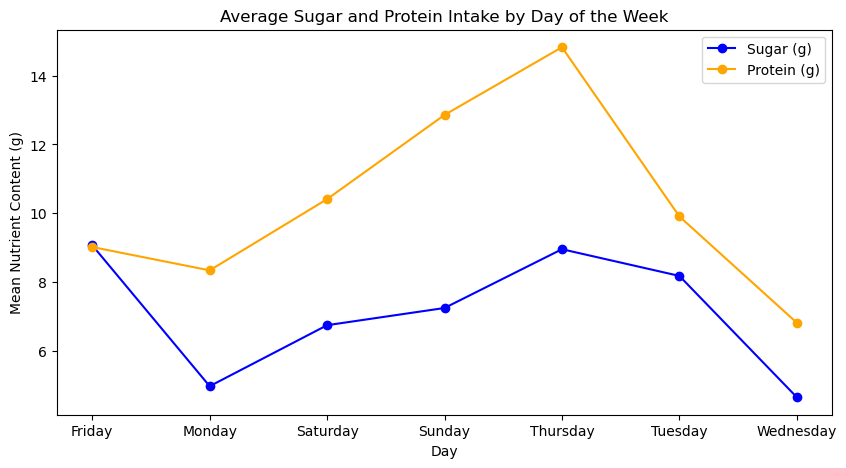

In [45]:
df['Date'] = pd.to_datetime(df['Date'])
df['Day'] = df['Date'].dt.day_name()
weekly_sugar = df.groupby('Day')['sugar'].mean()
protein_day = df.groupby('Day')['protein'].mean()
#calories_day = df.groupby('Day')['calories'].mean()
plt.figure(figsize=(10,5))
weekly_sugar.plot(marker='o', color='blue')
protein_day.plot(marker='o', color='orange')
plt.legend(['Sugar (g)', 'Protein (g)'])
plt.ylabel("Mean Nutrient Content (g)")
plt.title("Average Sugar and Protein Intake by Day of the Week")
#calories_day.plot(marker='o', color='green')


c:\Users\BranchCo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='calories', ylabel='Count'>

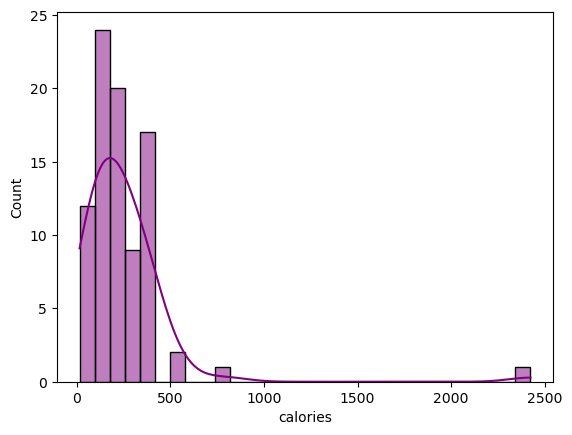

In [46]:
sns.histplot(df['calories'], bins=30, kde=True, color='purple')

Text(0.5, 1.0, 'Correlation Matrix of Nutritional Values')

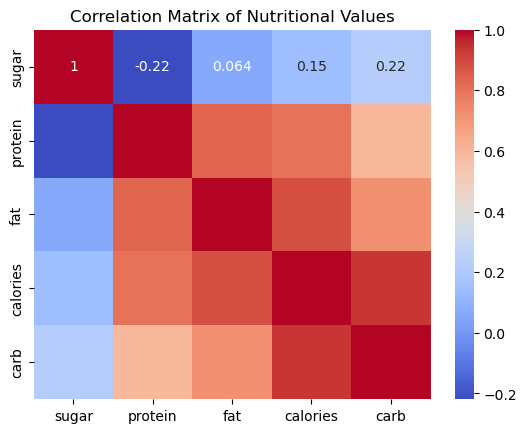

In [47]:
corr = df[['sugar', 'protein', 'fat', 'calories','carb']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Nutritional Values")

<Axes: >

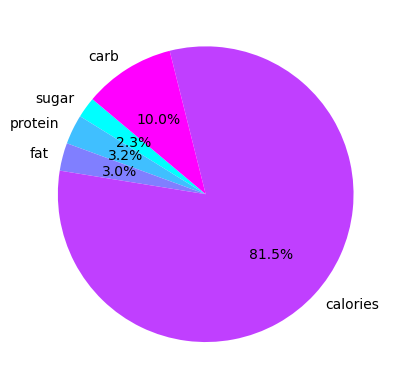

In [48]:
df[['sugar', 'protein', 'fat', 'calories','carb']].sum().plot(kind='pie',colormap='cool', autopct='%1.1f%%', startangle=140,color='black')

(array([20362, 20383], dtype=int64),
 [Text(20362, 0, '01\nOct\n2025'), Text(20383, 0, '22')])

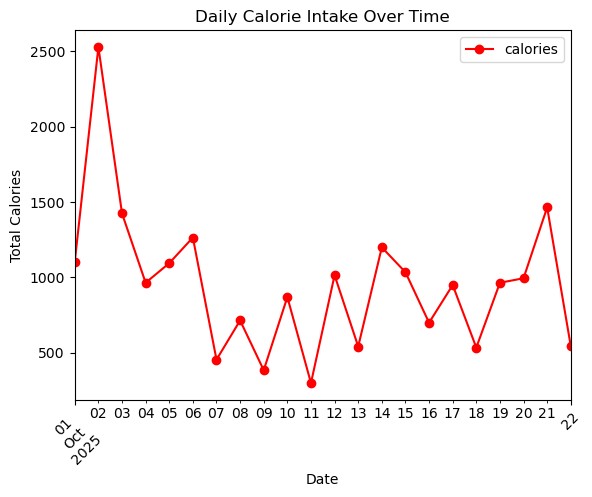

In [52]:
df[['Date','calories']].groupby('Date').sum().plot(kind='line', marker='o', color='red')
plt.title("Daily Calorie Intake Over Time")
plt.ylabel("Total Calories")
plt.xlabel("Date")
plt.xticks(rotation=45)